Insurance premium predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df2=pd.read_csv('https://raw.githubusercontent.com/Ranjit-Singh-786/insorance-Premium-Prediction/master/insurance.csv')
df2.head()#click on raw copy url

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df ['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [9]:
df['charges'].mean()

np.float64(13270.422265141257)

In [10]:
male=df[df['sex']=='male']

In [11]:
male['charges'].mean()

np.float64(13956.751177721893)

In [12]:
female=df[df['sex']=='female']

In [13]:
mean=female['charges'].mean()

In [14]:
df[df['sex']=='female']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [15]:
df2=female[female['charges']<=mean]
df2.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [16]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

the females whose mean is grreater than mean are half smokers

In [17]:
df3=female[female['charges']>=mean]
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
20,60,female,36.005,0,no,northeast,13228.84695
23,34,female,31.920,1,yes,northeast,37701.87680


In [18]:
df3['smoker'].value_counts()

smoker
yes    115
no     106
Name: count, dtype: int64

In [19]:
df2['children'].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [20]:
df2['region'].value_counts()

region
southwest    120
northwest    113
southeast    112
northeast     96
Name: count, dtype: int64

In [22]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'HealthyWeight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
df['Category'] = df['bmi'].apply(categorize_bmi)
category_counts = df['Category'].value_counts()
print(df)
print(category_counts)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

           Category  
0        Overweight  
1             Obese  
2             Obese  
3     HealthyWeight  
4        Overweight  
...             ...  
1333 

In [23]:
ls=list(df['bmi'])

In [24]:
label = []
for w in ls:
    if w<18.5:
        label.append('Underweight')
    elif w >18.5 and w<24.9:
        label.append('HealthyWeight')
    elif w>25.0 and w <29.9:
        label.append('Overweight')
    else:
        label.append('obese')

In [25]:
len(label)

1338

In [26]:
df['healthy']=label
df

,age,sex,bmi,children,smoker,region,charges,Category,healthy
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese,obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,Overweight


In [27]:
df['healthy'].value_counts()

healthy
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [29]:
group=df.groupby('healthy')

In [30]:
sort=group['charges'].agg(min_charges='min',max_charges='max',mean_charges='mean')

In [37]:
min_cha=sort.sort_values(by='min_charges')

,min_charges,max_charges,mean_charges
healthy,,,
HealthyWeight,1121.8739,35069.37452,10404.900084
obese,1131.5066,63770.42801,15420.399577
Overweight,1252.4070,38245.59327,11020.183782
Underweight,1621.3402,32734.18630,8852.200585


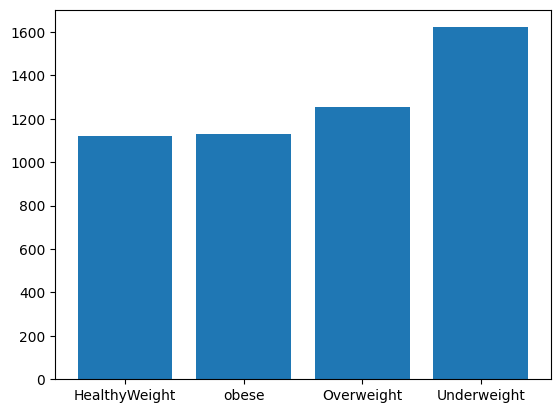

In [41]:
x=list(min_cha.index)
y=min_cha['min_charges'].values
plt.bar(x,y)
plt.show()

In [43]:
max_cha=sort.sort_values('max_charges')

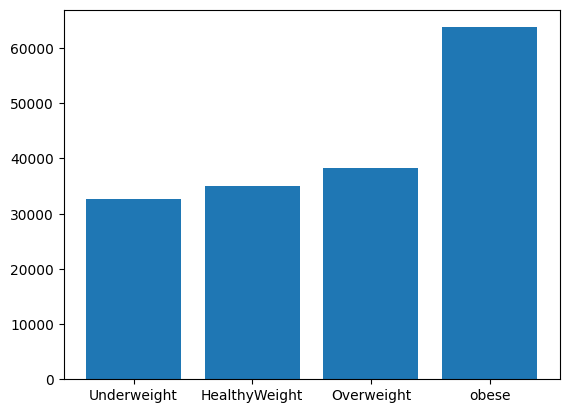

In [49]:
x=list(max_cha.index)
y=max_cha['max_charges'].values
plt.bar(x,y)
plt.show()

In [45]:
mean_ch=sort.sort_values('mean_charges')

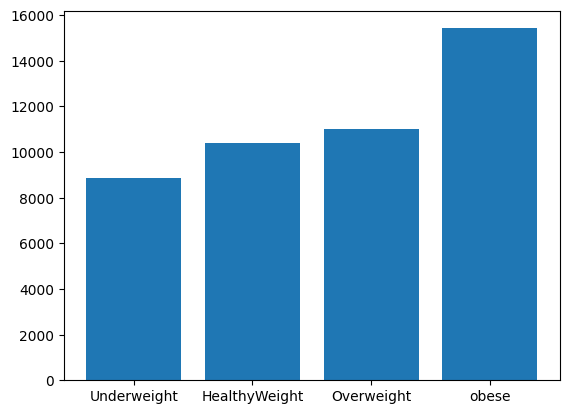

In [48]:
x=list(mean_ch.index)
y=mean_ch['mean_charges'].values
plt.bar(x,y)
plt.show()

In [50]:
groups=df.groupby('region')

In [59]:
sorts=groups['charges'].agg(min_charges='min',max_charges='max',mean_charges='mean')

In [60]:
minc=sorts.sort_values('min_charges')

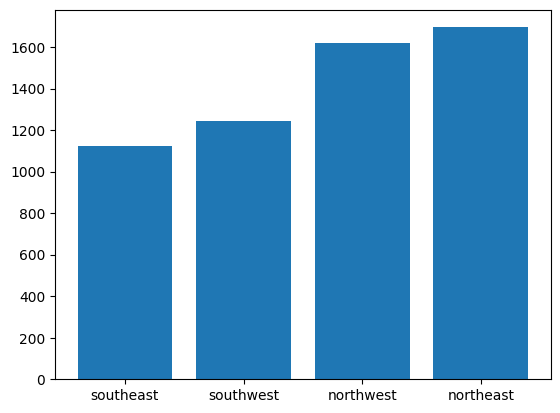

In [61]:
x=list(minc.index)
y=minc['min_charges'].values
plt.bar(x,y)
plt.show()

In [63]:
maxc=sorts.sort_values('max_charges')

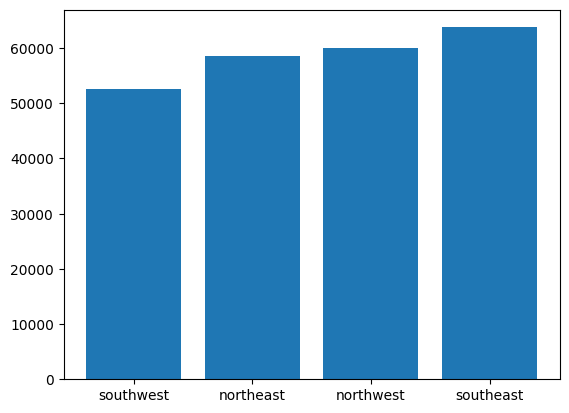

In [66]:
x=list(maxc.index)
y=maxc['max_charges'].values
plt.bar(x,y)
plt.show()

In [67]:
meanc=sorts.sort_values('mean_charges')

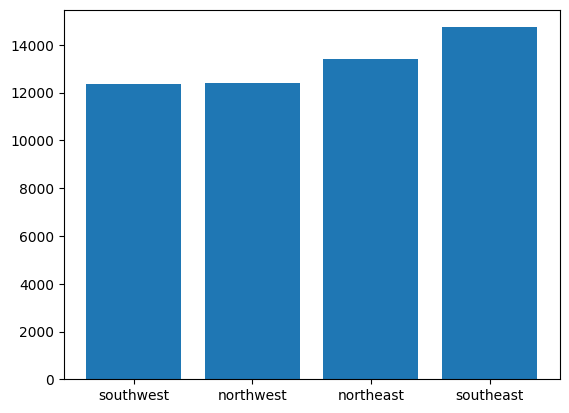

In [69]:
x=list(meanc.index)
y=meanc['mean_charges'].values
plt.bar(x,y)
plt.show()

In [70]:
df

,age,sex,bmi,children,smoker,region,charges,Category,healthy
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese,obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,Overweight


In [79]:
grp=df.groupby('children')

In [83]:
children=grp['charges'].agg(min_charges='min',max_charges='max',mean_charges='mean')

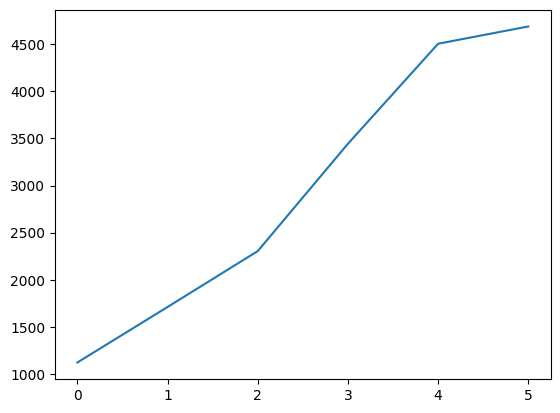

In [85]:
x=list(children.index)
y=children['min_charges'].values
plt.plot(x,y)
plt.show() #positive relation

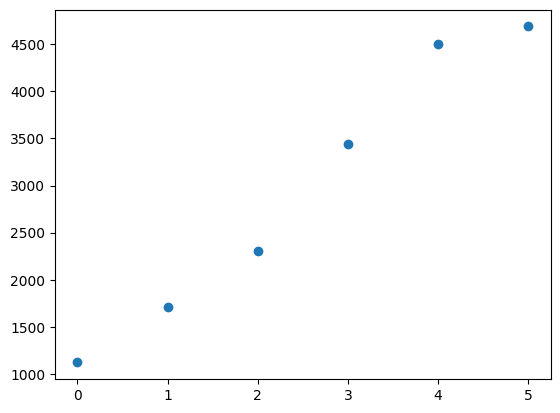

In [86]:
x=list(children.index)
y=children['min_charges'].values
plt.scatter(x,y)
plt.show() #positive relation

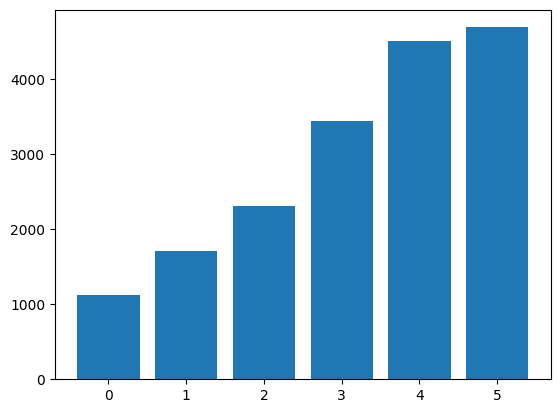

In [87]:
x=list(children.index)
y=children['min_charges'].values
plt.bar(x,y)
plt.show() #positive relation

In [92]:
len(x)

6

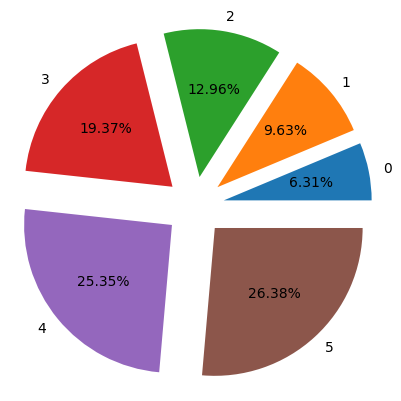

In [95]:
x=list(children.index)
y=children['min_charges'].values
explosion=[0.2,0.2,0.2,0.2,0.2,0.2]
plt.pie(y,labels=x,autopct='%1.2f%%',explode=explosion)
plt.show() #positive relation

{'whiskers': [<matplotlib.lines.Line2D at 0x22587cba850>,
 'caps': [<matplotlib.lines.Line2D at 0x22587cbba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22587c8ac10>],
 'medians': [<matplotlib.lines.Line2D at 0x22587ccccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22587ccd5d0>],
 'means': []}

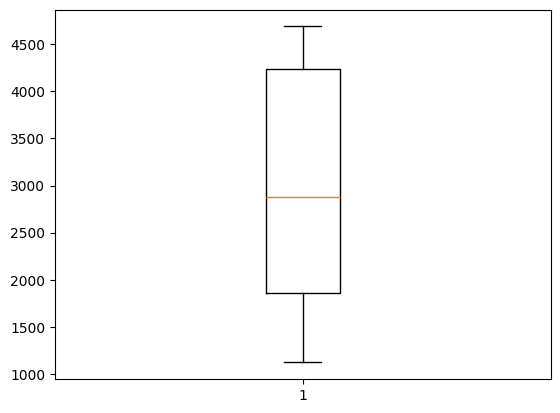

In [99]:
x=children['min_charges'].values
plt.boxplot(x) #no outliers

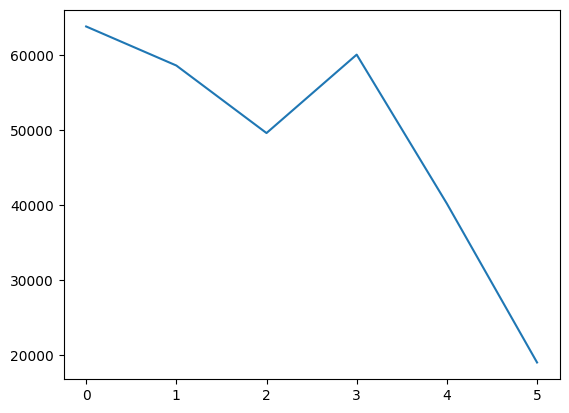

In [103]:
#for max_charges
x=list(children.index)
y=children['max_charges'].values
plt.plot(x,y)
plt.show() #negative than positive than again negative relation 

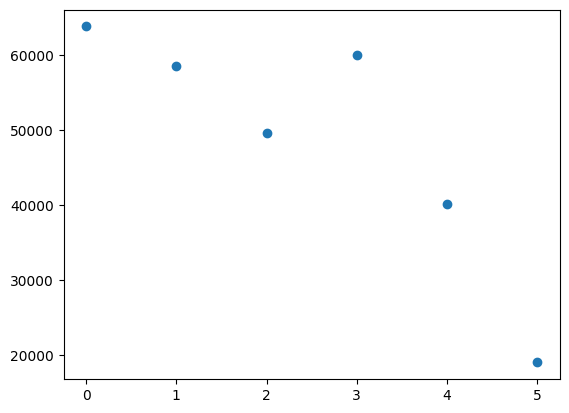

In [109]:
x=list(children.index)
y=children['max_charges'].values
plt.scatter(x,y)
plt.show() #negative than positive than again negative relation 

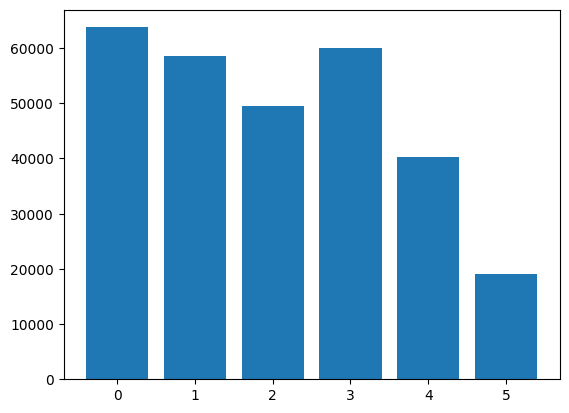

In [111]:
x=list(children.index)
y=children['max_charges'].values
plt.bar(x,y)
plt.show()

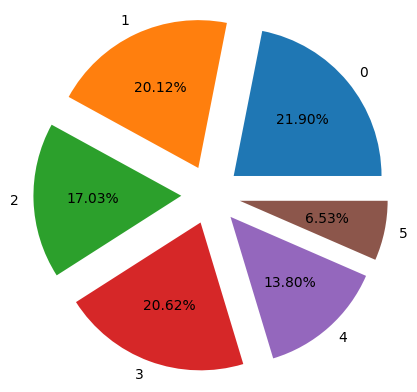

In [115]:
x=list(children.index)
y=children['max_charges'].values
explosion=[0.2,0.2,0.2,0.2,0.2,0.2]
plt.pie(y,labels=x,autopct='%1.2f%%',explode=explosion)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x22587fb8b50>,
 'caps': [<matplotlib.lines.Line2D at 0x22587fb9f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22587fb8550>],
 'medians': [<matplotlib.lines.Line2D at 0x22587f545d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22587f548d0>],
 'means': []}

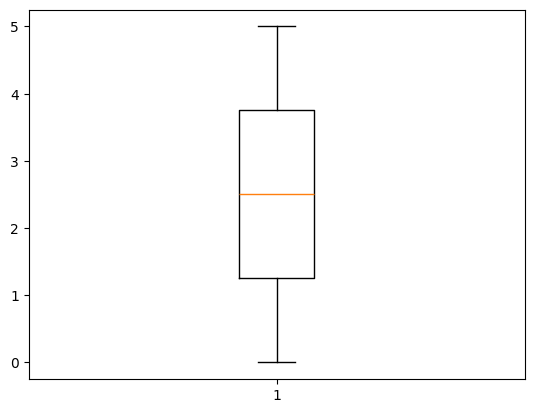

In [116]:
plt.boxplot(x)#no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22587ed85d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22587edaa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22587ed7950>],
 'medians': [<matplotlib.lines.Line2D at 0x22587eda490>],
 'fliers': [<matplotlib.lines.Line2D at 0x22587edbf50>],
 'means': []}

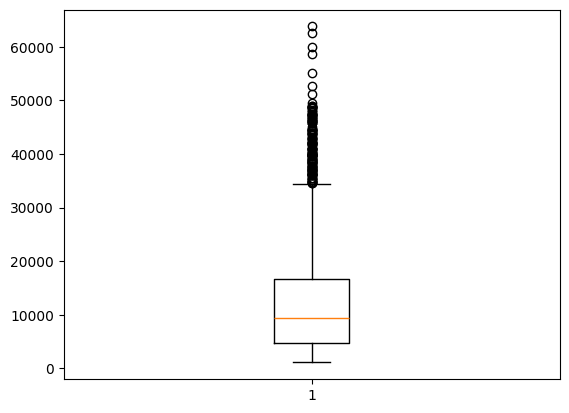

In [117]:
plt.boxplot(df['charges'])#lot of outliers 

In [118]:
df

,age,sex,bmi,children,smoker,region,charges,healthy
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


<Axes: xlabel='min_charges', ylabel='mean_charges'>

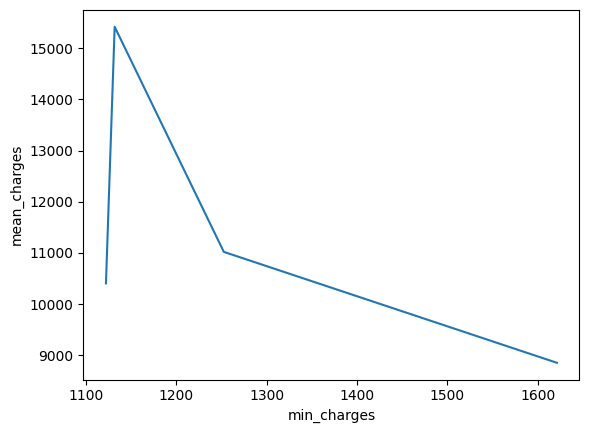

In [122]:
sns.lineplot(x='min_charges',y='mean_charges',data=sort)

In [123]:
df

,age,sex,bmi,children,smoker,region,charges,healthy
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [141]:
female=df[df['sex']=='female']

In [145]:
female

,age,sex,bmi,children,smoker,region,charges,healthy
0,19,female,27.90,0,yes,southwest,16884.92400,Overweight
5,31,female,25.74,0,no,southeast,3756.62160,Overweight
6,46,female,33.44,1,no,southeast,8240.58960,obese
7,37,female,27.74,3,no,northwest,7281.50560,Overweight
9,60,female,25.84,0,no,northwest,28923.13692,Overweight
...,...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500,obese
1334,18,female,31.92,0,no,northeast,2205.98080,obese
1335,18,female,36.85,0,no,southeast,1629.83350,obese
1336,21,female,25.80,0,no,southwest,2007.94500,Overweight


In [147]:
bmi=female[female['bmi']<=18]
bmi

,age,sex,bmi,children,smoker,region,charges,healthy
128,32,female,17.765,2,yes,northwest,32734.18630,Underweight
232,19,female,17.800,0,no,southwest,1727.78500,Underweight
380,27,female,17.955,2,yes,northeast,15006.57945,Underweight
412,26,female,17.195,2,yes,northeast,14455.64405,Underweight
428,21,female,16.815,1,no,northeast,3167.45585,Underweight
680,21,female,17.400,1,no,southwest,2585.26900,Underweight
1029,37,female,17.290,2,no,northeast,6877.98010,Underweight
1286,28,female,17.290,0,no,northeast,3732.62510,Underweight


the northwest area doesn't have any underweight people and norsteast is the only region where there are smokers<br>the northwest region have more number of underweight people and have positive relationship between charges and age

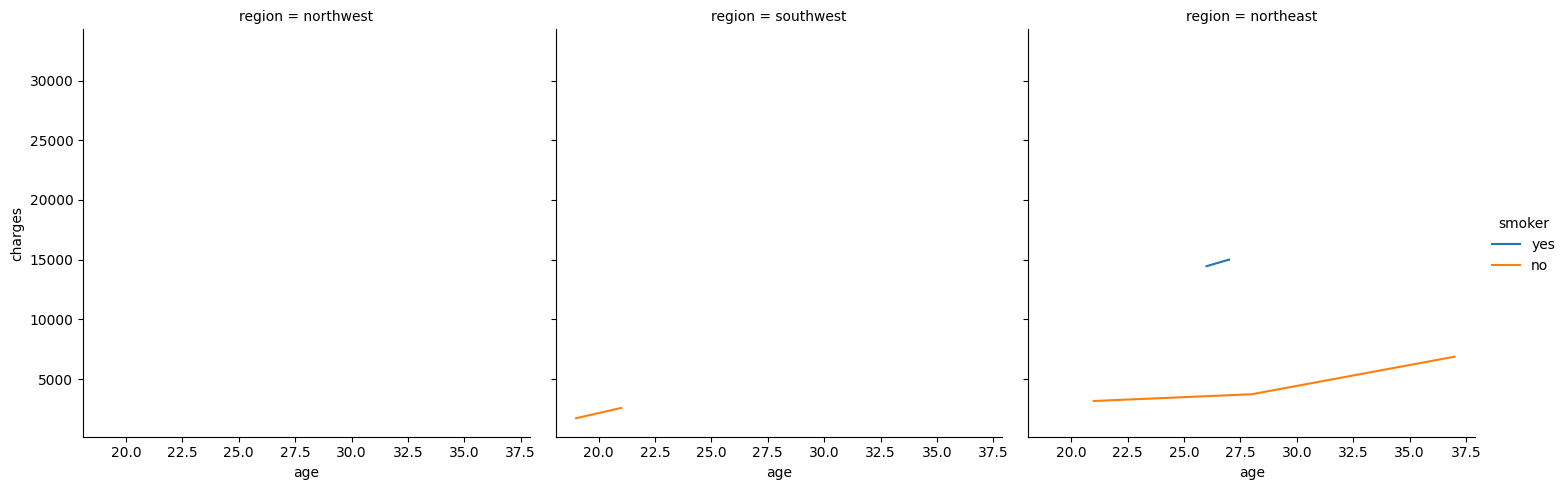

In [149]:
sns.relplot(x='age',y='charges',data=bmi,kind='line',hue='smoker',col='region')#the northwest area doesn't have any underweight people and norsteast is the only region where there are smokers

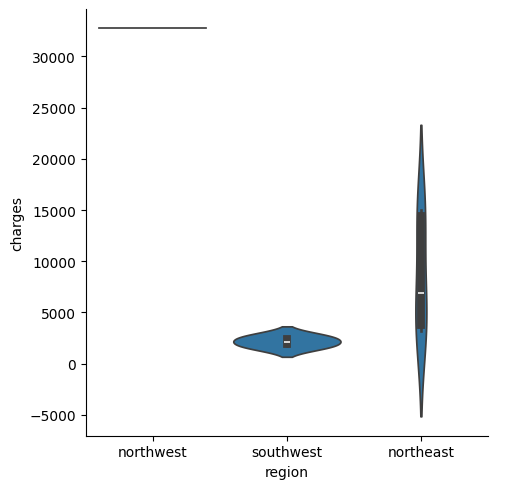

In [151]:
sns.catplot(x='region',y='charges',data=bmi,kind='violin')

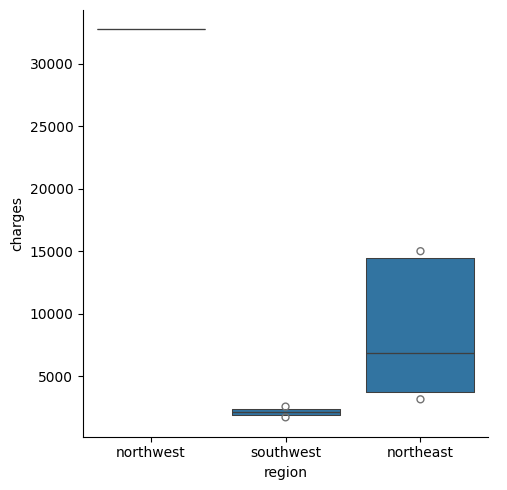

In [154]:
sns.catplot(x='region',y='charges',data=bmi,kind='boxen')

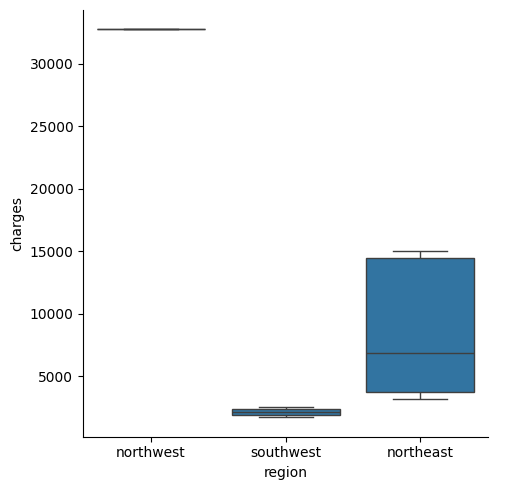

In [156]:
sns.catplot(x='region',y='charges',data=bmi,kind='box')

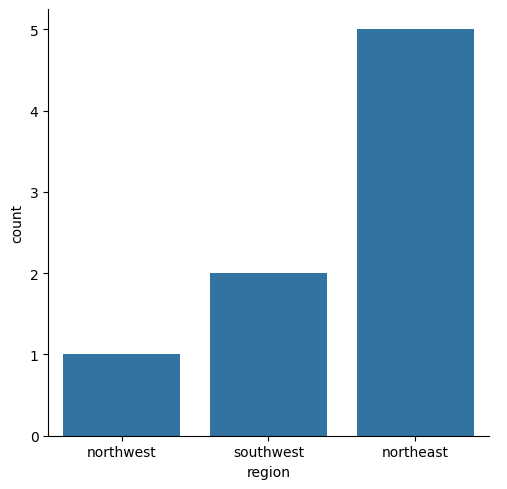

In [158]:
sns.catplot(x='region',data=bmi,kind='count')

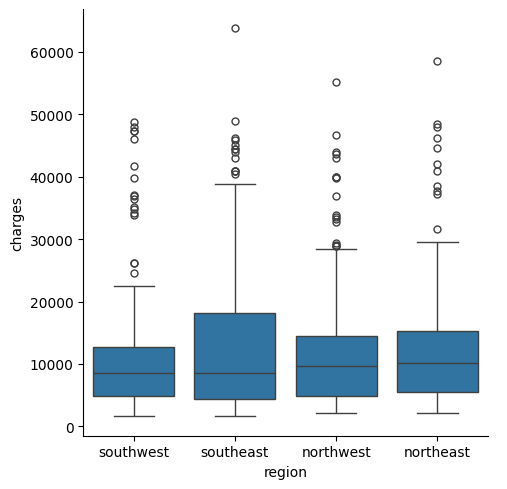

In [160]:
sns.catplot(x='region',y='charges',data=female,kind='box')

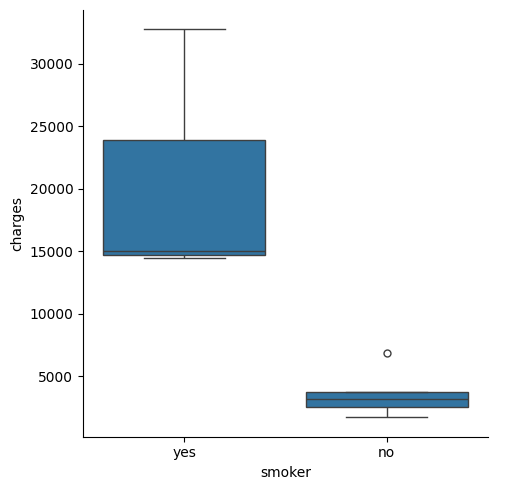

In [161]:
sns.catplot(x='smoker',y='charges',data=bmi,kind='box')

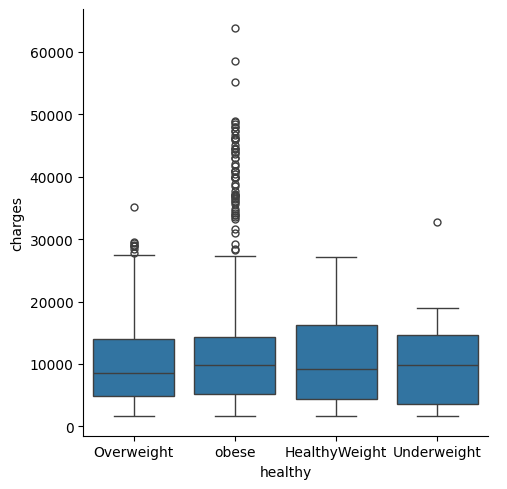

In [165]:
sns.catplot(x='healthy',y='charges',data=female,kind='box')

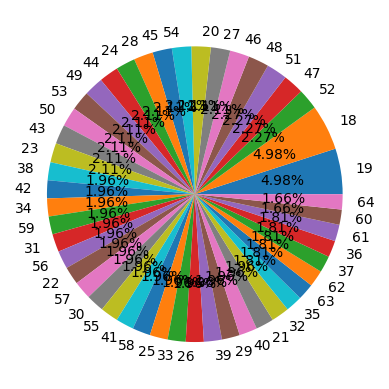

In [169]:
x=list(female['age'].value_counts().keys())
y=list(female['age'].value_counts().values)

plt.pie(y,labels=x,autopct='%1.2f%%')
plt.show()

In [171]:
female['bmi'].max()

np.float64(48.07)

In [183]:
female['region'].value_counts().values

array([175, 164, 162, 161])

(array([ 33.,  87.,  68., 265.]),
 array([ 0. , 18.5, 24. , 29. , 48. ]),
 <BarContainer object of 4 artists>)

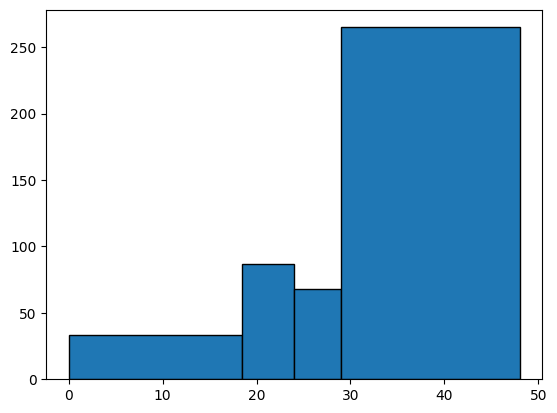

In [187]:
ls=[0,18.5,24,29,48]
region=list(female['age'].values)
plt.hist(region,ec='k',bins=ls)